# 用Beautiful Soup來做海狗圖片爬蟲
### 這是一個很方便的Python模組，可以用來做網站資料的截取及資料分析。期中專題試著用Beautifulsoup透過google搜尋海狗的圖片，然後解析網頁資料，最後在一次下載需要的圖檔數量，並存擋。

### 1. 先透過Google搜尋關鍵字“海狗”，取得搜尋網址

In [49]:
import requests
reqImage = requests.get('https://www.google.com/search?biw=1440&bih=820&tbm=isch&sa=1&ei=cxCuXIK5Aei4mAWAyqiwDQ&q=Furseal&oq=Furseal&gs_l=img.3..0j0i30l3j0i10i24.369797.376496..377118...7.0..0.61.635.14......1....1..gws-wiz-img.......35i39j0i19.1Dpjn9sAw9I')

### 2. 看看剛取得的reqImage有什麼內容，原來圖檔都是放在img 標籤之後

In [50]:
reqImage.text

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-TW"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><noscript><meta content="0;url=/search?q=Furseal&amp;tbm=isch&amp;biw=1440&amp;bih=820&amp;ie=UTF-8&amp;gbv=1&amp;sei=lSiuXLGrA92Gr7wP3f-O6Ao" http-equiv="refresh"><style>table,div,span,p{display:none}</style><div style="display:block">&#22914;&#26524;&#31995;&#32113;&#27794;&#26377;&#22312;&#25976;&#31186;&#37912;&#24460;&#23559;&#24744;&#37325;&#26032;&#23566;&#21521;&#65292;&#35531;&#25353;&#19968;&#19979;<a href="/search?q=Furseal&amp;tbm=isch&amp;biw=1440&amp;bih=820&amp;ie=UTF-8&amp;gbv=1&amp;sei=lSiuXLGrA92Gr7wP3f-O6Ao">&#36889;&#35041;</a>&#12290;</div></noscript><title>Furseal - Google &#25628;&#23563;</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !impo

### 3. 使用BeautifulSoup的select()先把img標籤抓出來

In [51]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(reqImage.text,'lxml')
soup.select('img')

[<img alt="「Furseal」的圖片搜尋結果" height="150" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRN7U13cfklb-JgSKRa17C-_ZltX86zc4w0Qe7IHEa6TlIbMpLUF7KAYDV9" width="100"/>,
 <img alt="「Furseal」的圖片搜尋結果" height="107" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQB3-yZdlCV489BViStnV7qclsimH4g-LkfhxjBUOqZKkxLXRRL6NDqO8k" width="143"/>,
 <img alt="「Furseal」的圖片搜尋結果" height="104" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSF8XNg0E3othC5zkQdSgECNwAYsGwuI0rMZxowe_GsO49_RJkjrqMTQn7w" width="148"/>,
 <img alt="「Furseal」的圖片搜尋結果" height="98" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcz0eYeH42IkTEWBh7AsBe-4oiEZCv-B6zqSHGjFPvOTjoWpGWrKCfbNpv" width="150"/>,
 <img alt="「Furseal」的圖片搜尋結果" height="112" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBHc3t3UIKIHF0s74APSjjwg9RRT4hju_2zhdSucES0Xlbs7CpdEHK2kg" width="72"/>,
 <img alt="「Furseal」的圖片搜尋結果" height="115" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSwKacwO2QmLlMMjAQdD6sY

### 4. 圖檔的連結位置就在src字串，所以先把網址解析出來

In [52]:
for weblink in soup.select('img'):
    print (weblink.get('src'))

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRN7U13cfklb-JgSKRa17C-_ZltX86zc4w0Qe7IHEa6TlIbMpLUF7KAYDV9
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQB3-yZdlCV489BViStnV7qclsimH4g-LkfhxjBUOqZKkxLXRRL6NDqO8k
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSF8XNg0E3othC5zkQdSgECNwAYsGwuI0rMZxowe_GsO49_RJkjrqMTQn7w
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcz0eYeH42IkTEWBh7AsBe-4oiEZCv-B6zqSHGjFPvOTjoWpGWrKCfbNpv
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBHc3t3UIKIHF0s74APSjjwg9RRT4hju_2zhdSucES0Xlbs7CpdEHK2kg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSwKacwO2QmLlMMjAQdD6sYgJEqcIMl3XqlMq4GqUp0mftVfBqVcLbwg
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR46LKKsCBjNkJdAzO-HvgdP-y4n5GRtLvhkwcaSCdJaI-xtbZlhxiyxLc
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT6R8LE_ZTomO-_pdCwtuIWJYyaHdDc_k6Gag6bVPR5D1SxWMteh0QJKL0
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQEefWSMECr3AkX4Ov9TeZ4DtxP45qylQMO6FtGbrqFJmPO5j

### 5. 將圖片的寫入到檔案，然後利用PIL模組檢查一下寫入檔案圖片是否正確

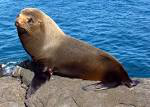

In [53]:
with open ('Furseal_001.jpg', 'wb') as fsf:
    reqImage = requests.get("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR46LKKsCBjNkJdAzO-HvgdP-y4n5GRtLvhkwcaSCdJaI-xtbZlhxiyxLc")
    fsf.write(reqImage.content)
    
from PIL import Image
Image.open('Furseal_001.jpg')

### 6. 接下來快速的一次性抓取圖片，然把圖檔存到資料夾內。將搜尋網址的搜尋關鍵字以{}代替

In [54]:
DataUrl = 'https://www.google.com/search?biw=1440&bih=820&tbm=isch&sa=1&ei=cxCuXIK5Aei4mAWAyqiwDQ&q={}&oq=Furseal&gs_l=img.3..0j0i30l3j0i10i24.369797.376496..377118...7.0..0.61.635.14......1....1..gws-wiz-img.......35i39j0i19.1Dpjn9sAw9I'

def getImage(SealType, FilePath):
    for i in range (3):
        reqImageAll = requests.get(DataUrl.format(SealType, i*100))
        reqImage = requests.get(DataUrl)        
        for weblink in soup.select('img'):
            Imageurl = weblink.get('src')
            filename = Imageurl.split('tbn:')[1]
            with open(FilePath + filename + '.jpg', 'wb') as fsf:
                reqImageAll2 = requests.get(Imageurl)
                fsf.write(reqImageAll2.content)

### 7. 建立一個存放圖片的目錄

In [43]:
import os
os.mkdir ('FurSeal/')

### 8. 輸入搜尋關鍵字傳回到{}，然後將圖片存在FurSeal目錄內

In [46]:
getImage('Fur Seal', 'FurSeal/')

### 9. 結果

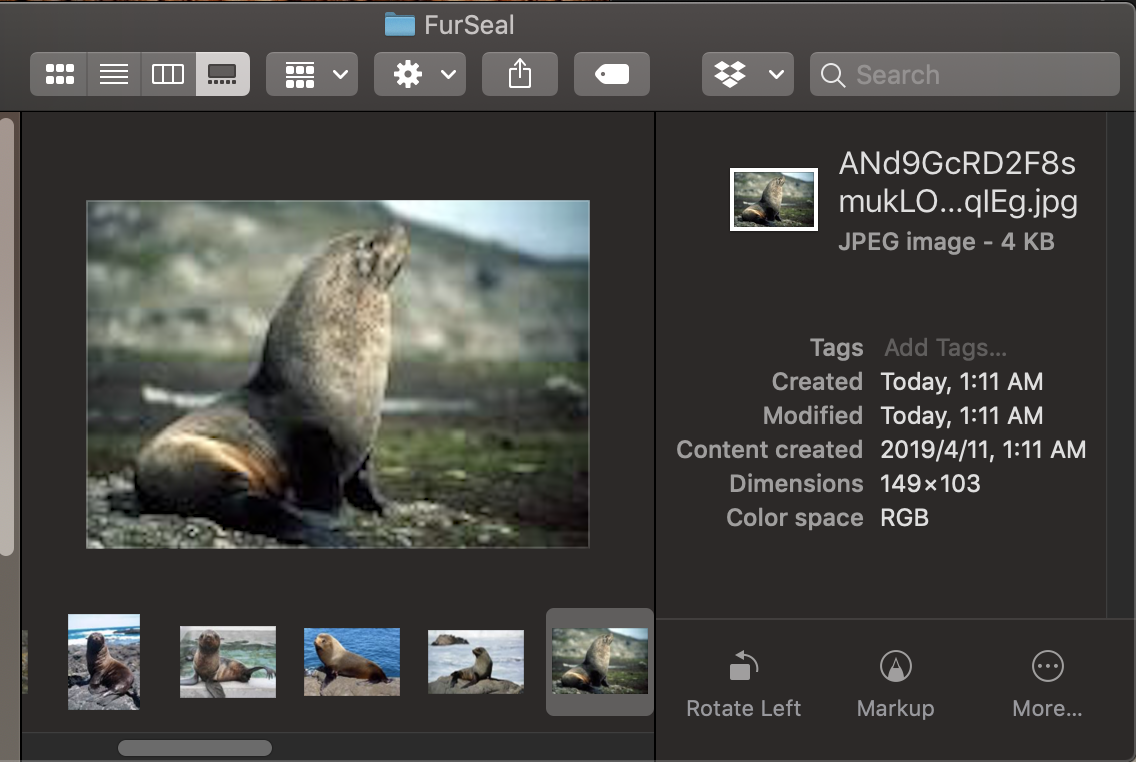